In [1]:
# Paths for data.
Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/"
Tess = r"/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/"
Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"

In [2]:
########### RAVDESS ###############


# Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
# Vocal channel (01 = speech, 02 = song).
# Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
# Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
# Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
# Repetition (01 = 1st repetition, 02 = 2nd repetition).
# Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).


# Example of an audio filename: 02-01-06-01-02-01-12.mp4

# Video-only (02)
# Speech (01)
# Fearful (06)
# Normal intensity (01)
# Statement "dogs" (02)
# 1st Repetition (01)
# 12th Actor (12) - Female (as the actor ID number is even)

In [3]:
########### RAVDESS ###############

import os
import pandas as pd
import numpy as np
ravdess_directory_list = os.listdir(Ravdess) # a01, a02, ...
file_emotion = []
file_path = []
ravdess_directory_list.remove('audio_speech_actors_01-24')
for i in ravdess_directory_list:
    current_actor_contents = os.listdir(Ravdess + i)
    for audio_files in current_actor_contents:
        curr_file_name = audio_files.split('.')[0]
        curr_emotion = int(curr_file_name.split('-')[2]) # Emotion of the audio
        # Append values in list
        file_emotion.append(curr_emotion)
        file_path.append(Ravdess + i + '/' + audio_files)

# Creating a dataframe
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
Ravdess_df['Emotions'] = Ravdess_df['Emotions'].map({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
Ravdess_df.head() # Ravdess DataFrame

,Emotions,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/A...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/A...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/A...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/A...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/A...


In [4]:
########### TESS ###############
file_emotion = []
file_path = []
tess_folders = os.listdir(Tess)
for i in tess_folders:
    curr_file_contents = os.listdir(Tess + i)
    for j in curr_file_contents:
        part = j.split('.')[0].split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + i + '/' + j)

# Creating dataframe
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
tess_df = pd.concat([emotion_df, path_df], axis=1) 
tess_df.head() # Tess DataFrame

,Emotions,Path
0,fear,/kaggle/input/toronto-emotional-speech-set-tes...
1,fear,/kaggle/input/toronto-emotional-speech-set-tes...
2,fear,/kaggle/input/toronto-emotional-speech-set-tes...
3,fear,/kaggle/input/toronto-emotional-speech-set-tes...
4,fear,/kaggle/input/toronto-emotional-speech-set-tes...


In [5]:
########## SAVEE ###########
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []
for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head() # Savee DataFrame

,Emotions,Path
0,happy,/kaggle/input/surrey-audiovisual-expressed-emo...
1,fear,/kaggle/input/surrey-audiovisual-expressed-emo...
2,happy,/kaggle/input/surrey-audiovisual-expressed-emo...
3,disgust,/kaggle/input/surrey-audiovisual-expressed-emo...
4,angry,/kaggle/input/surrey-audiovisual-expressed-emo...


In [6]:
# Creating the main dataframe (combination of Ravdess, Tess, Savee)
df = pd.concat([Ravdess_df, tess_df, Savee_df], axis = 0)
df.to_csv("data_path.csv",index=False)
df.head()

,Emotions,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/A...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/A...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/A...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/A...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/A...


In [7]:
print(df['Emotions'].unique())

['surprise' 'neutral' 'disgust' 'fear' 'sad' 'calm' 'happy' 'angry']


In [8]:
# emotion[] -> use from df itself

In [9]:
# # Count plot
from matplotlib import pyplot as plt
import seaborn as sns
# sns.barplot(x='Emotions', y='count', data=df.groupby('Emotions').size().reset_index(name='count'))
# # plt.title('Count of Emotions', size=16)
# # sns.countplot(df.Emotions)
# # plt.ylabel('Count', size=12)
# # plt.xlabel('Emotions', size=12)
# # sns.despine(top=True, right=True, left=False, bottom=False)
# # plt.show()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
from scipy.stats import zscore
import librosa

signal = []

# Sample rate (16.0 kHz)
sample_rate = 16000     

# Max pad lenght (3.0 sec)
max_pad_len = 49100

for index,path in enumerate(df.Path):
    X, sample_rate = librosa.load(path
                                  ,duration=3
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    y = zscore(X)
        
    # Padding or truncated signal 
    if len(y) < max_pad_len:    
        y_padded = np.zeros(max_pad_len)
        y_padded[:len(y)] = y
        y = y_padded
    elif len(y) > max_pad_len:
        y = np.asarray(y[:max_pad_len])

    # Add to signal list
    signal.append(y)

In [11]:
new_dict = {'neutral':1, 'calm':2, 'happy':3, 'sad':4, 'angry':5, 'fear':6, 'disgust':7, 'surprise':8}
labelss = np.asarray(df['Emotions']).ravel()
labels = []
for i in labelss:
    labels.append(new_dict[i])
np.unique(labels)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [12]:
def noisy_signal(signal, snr_low=15, snr_high=30, nb_augmented=2):
    
    # Signal length
    signal_len = len(signal)

    # Generate White noise
    noise = np.random.normal(size=(nb_augmented, signal_len))
    
    # Compute signal and noise power
    s_power = np.sum((signal / (2.0 ** 15)) ** 2) / signal_len
    n_power = np.sum((noise / (2.0 ** 15)) ** 2, axis=1) / signal_len
    
    # Random SNR: Uniform [15, 30]
    snr = np.random.randint(snr_low, snr_high)
    
    # Compute K coeff for each noise
    K = np.sqrt((s_power / n_power) * 10 ** (- snr / 10))
    K = np.ones((signal_len, nb_augmented)) * K
    
    # Generate noisy signal
    return signal + K.T * noise

In [13]:
augmented_signal = list(map(noisy_signal, signal))

In [14]:
def mel_spectrogram(y, sr=16000, n_fft=512, win_length=256, hop_length=128, window='hamming', n_mels=128, fmax=4000):
    
    # Compute spectogram
    mel_spect = np.abs(librosa.stft(y, n_fft=n_fft, window=window, win_length=win_length, hop_length=hop_length)) ** 2
    
    # Compute mel spectrogram
    mel_spect = librosa.feature.melspectrogram(S=mel_spect, sr=sr, n_mels=n_mels, fmax=fmax)
    
    # Compute log-mel spectrogram
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    
    return mel_spect

In [15]:
mel_spect = np.asarray(list(map(mel_spectrogram, signal)))
augmented_mel_spect = [np.asarray(list(map(mel_spectrogram, augmented_signal[i]))) for i in range(len(augmented_signal))]

In [16]:
from sklearn.model_selection import train_test_split
import itertools
MEL_SPECT_train, MEL_SPECT_test, AUG_MEL_SPECT_train, AUG_MEL_SPECT_test, label_train, label_test = train_test_split(mel_spect, augmented_mel_spect,labels, test_size=0.2,random_state=1)

# Build augmented labels and train
aug_label_train = np.asarray(list(itertools.chain.from_iterable([[label] * 2 for label in label_train])))
AUG_MEL_SPECT_train = np.asarray(list(itertools.chain.from_iterable(AUG_MEL_SPECT_train)))

# Concatenate original and augmented
X_train = np.concatenate((MEL_SPECT_train, AUG_MEL_SPECT_train))
y_train = np.concatenate((label_train, aug_label_train))

# Build test set
X_test = MEL_SPECT_test
y_test = label_test

In [17]:
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)

Shape of X_train (11328, 128, 384)
Shape of y_train (11328,)


In [18]:
win_ts = 128
hop_ts = 64

# Split spectrogram into frames
def frame(x, win_step=128, win_size=64):
    nb_frames = 1 + int((x.shape[2] - win_size) / win_step)
    frames = np.zeros((x.shape[0], nb_frames, x.shape[1], win_size)).astype(np.float32)
    for t in range(nb_frames):
        frames[:,t,:,:] = np.copy(x[:,:,(t * win_step):(t * win_step + win_size)]).astype(np.float32)
    return frames

# Frame for TimeDistributed model
X_train = frame(X_train, hop_ts, win_ts)
X_test = frame(X_test, hop_ts, win_ts)

In [19]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56438 sha256=b45fedd4359d0cbffdf843a94c82af764aa59fa68056b2ef64eea79f22297a16
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [20]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(np.ravel(y_train)))
y_test = to_categorical(lb.transform(np.ravel(y_test)))

In [21]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , X_train.shape[2], X_train.shape[3], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , X_test.shape[2], X_test.shape[3], 1)

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, TimeDistributed, concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization, LeakyReLU, Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import backend as K
# from keras.utils import np_utils
from keras.utils import plot_model
from tensorflow.keras.layers import Bidirectional
from sklearn.preprocessing import LabelEncoder

K.clear_session()


# Define two sets of inputs: MFCC and FBANK
input_y = Input(shape=X_train.shape[1:], name='Input_MELSPECT')

## First LFLB (local feature learning block)
y = TimeDistributed(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_1_MELSPECT')(input_y)
y = TimeDistributed(BatchNormalization(), name='BatchNorm_1_MELSPECT')(y)
y = TimeDistributed(Activation('elu'), name='Activ_1_MELSPECT')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'), name='MaxPool_1_MELSPECT')(y)
y = TimeDistributed(Dropout(0.2), name='Drop_1_MELSPECT')(y)     

## Second LFLB (local feature learning block)
y = TimeDistributed(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_2_MELSPECT')(y)
y = TimeDistributed(BatchNormalization(), name='BatchNorm_2_MELSPECT')(y)
y = TimeDistributed(Activation('elu'), name='Activ_2_MELSPECT')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'), name='MaxPool_2_MELSPECT')(y)
y = TimeDistributed(Dropout(0.2), name='Drop_2_MELSPECT')(y)

## Second LFLB (local feature learning block)
y = TimeDistributed(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_3_MELSPECT')(y)
y = TimeDistributed(BatchNormalization(), name='BatchNorm_3_MELSPECT')(y)
y = TimeDistributed(Activation('elu'), name='Activ_3_MELSPECT')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'), name='MaxPool_3_MELSPECT')(y)
y = TimeDistributed(Dropout(0.2), name='Drop_3_MELSPECT')(y)

## Second LFLB (local feature learning block)
y = TimeDistributed(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'), name='Conv_4_MELSPECT')(y)
y = TimeDistributed(BatchNormalization(), name='BatchNorm_4_MELSPECT')(y)
y = TimeDistributed(Activation('elu'), name='Activ_4_MELSPECT')(y)
y = TimeDistributed(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'), name='MaxPool_4_MELSPECT')(y)
y = TimeDistributed(Dropout(0.2), name='Drop_4_MELSPECT')(y)  

## Flat
y = TimeDistributed(Flatten(), name='Flat_MELSPECT')(y)                      
                               
# Apply 2 LSTM layer and one FC
# y = LSTM(256, return_sequences=False, dropout=0.2, name='LSTM_1')(y)
y = Bidirectional(LSTM(256, return_sequences=False, dropout=0.2), name='BiLSTM_1')(y)
y = Dense(y_train.shape[1], activation='softmax', name='FC')(y)

# Build final model
model = Model(inputs=input_y, outputs=y)

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_MELSPECT (InputLayer  [(None, 5, 128, 128, 1)   0         
 )                           ]                                   
                                                                 
 Conv_1_MELSPECT (TimeDistr  (None, 5, 128, 128, 64)   640       
 ibuted)                                                         
                                                                 
 BatchNorm_1_MELSPECT (Time  (None, 5, 128, 128, 64)   256       
 Distributed)                                                    
                                                                 
 Activ_1_MELSPECT (TimeDist  (None, 5, 128, 128, 64)   0         
 ributed)                                                        
                                                                 
 MaxPool_1_MELSPECT (TimeDi  (None, 5, 64, 64, 64)     0     

In [24]:
model.compile(optimizer=SGD(lr=0.01, weight_decay=1e-6, momentum=0.8), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_acc', patience=30, verbose=1, mode='max')

# Fit model
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50


2023-11-26 09:42:52.403133: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/Drop_1_MELSPECT/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


177/177 [==============================] - 106s 503ms/step - loss: 1.8311 - accuracy: 0.2703 - val_loss: 1.6141 - val_accuracy: 0.4004
Epoch 2/50
177/177 [==============================] - 87s 492ms/step - loss: 1.4552 - accuracy: 0.4537 - val_loss: 1.3164 - val_accuracy: 0.5169
Epoch 3/50
177/177 [==============================] - 87s 492ms/step - loss: 1.1714 - accuracy: 0.5800 - val_loss: 2.0562 - val_accuracy: 0.3538
Epoch 4/50
177/177 [==============================] - 87s 492ms/step - loss: 0.9940 - accuracy: 0.6508 - val_loss: 2.1432 - val_accuracy: 0.3633
Epoch 5/50
177/177 [==============================] - 87s 492ms/step - loss: 0.8724 - accuracy: 0.6970 - val_loss: 1.8462 - val_accuracy: 0.4439
Epoch 6/50
177/177 [==============================] - 87s 491ms/step - loss: 0.8001 - accuracy: 0.7151 - val_loss: 1.9698 - val_accuracy: 0.4258
Epoch 7/50
177/177 [==============================] - 87s 491ms/step - loss: 0.7545 - accuracy: 0.7325 - val_loss: 1.3781 - val_accuracy: 0.

In [25]:
score = model.evaluate(X_test, y_test, verbose=0)
score

[0.7683398127555847, 0.7510592937469482]

In [39]:
model.save('[CNN-BiLSTM]M.h5')
model.save_weights('[CNN-BiLSTM]W.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
# model_name = 'Emotion_Model.h5'
# save_dir = os.path.join(os.getcwd(), 'saved_models')

# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('Save model and weights at %s ' % model_path)

# # Save the model to disk
# model_json = model.to_json()
# with open("model_json.json", "w") as json_file:
#     json_file.write(model_json)

In [40]:
preds = model.predict(X_test)

preds=preds.argmax(axis=1)
preds

30/30 [==============================] - 2s 61ms/step


array([0, 6, 7, 6, 2, 2, 3, 0, 7, 4, 2, 3, 2, 4, 2, 3, 0, 3, 3, 6, 2, 4,
       3, 6, 3, 5, 5, 4, 6, 0, 2, 2, 6, 5, 1, 2, 3, 6, 7, 2, 5, 1, 2, 0,
       7, 4, 6, 4, 4, 2, 3, 4, 1, 6, 6, 3, 3, 3, 6, 6, 2, 4, 5, 4, 3, 0,
       3, 3, 3, 3, 4, 7, 7, 6, 3, 2, 3, 5, 6, 5, 2, 6, 3, 3, 4, 5, 7, 7,
       6, 3, 4, 3, 1, 4, 0, 2, 3, 5, 2, 7, 3, 5, 0, 2, 5, 6, 3, 0, 4, 3,
       0, 2, 3, 4, 4, 4, 6, 2, 2, 2, 7, 3, 4, 3, 4, 7, 7, 6, 4, 7, 2, 1,
       5, 6, 6, 3, 1, 0, 1, 5, 4, 3, 6, 2, 2, 7, 2, 7, 5, 1, 4, 1, 2, 7,
       6, 2, 5, 2, 3, 3, 4, 0, 0, 3, 7, 5, 7, 2, 1, 0, 6, 6, 7, 6, 6, 2,
       1, 6, 4, 5, 1, 6, 4, 2, 3, 5, 3, 3, 6, 3, 3, 6, 6, 3, 4, 0, 6, 6,
       2, 7, 1, 3, 5, 7, 6, 4, 3, 7, 0, 4, 2, 0, 1, 7, 0, 6, 2, 7, 3, 2,
       0, 6, 7, 4, 5, 7, 0, 3, 3, 2, 2, 1, 2, 3, 2, 6, 1, 3, 4, 6, 7, 6,
       7, 2, 0, 2, 7, 6, 6, 3, 3, 6, 7, 6, 3, 7, 3, 7, 1, 7, 6, 3, 2, 6,
       3, 3, 3, 0, 6, 2, 0, 6, 7, 3, 7, 7, 3, 6, 3, 6, 4, 7, 3, 7, 2, 6,
       2, 3, 6, 3, 1, 4, 5, 0, 4, 2, 3, 1, 4, 6, 3,

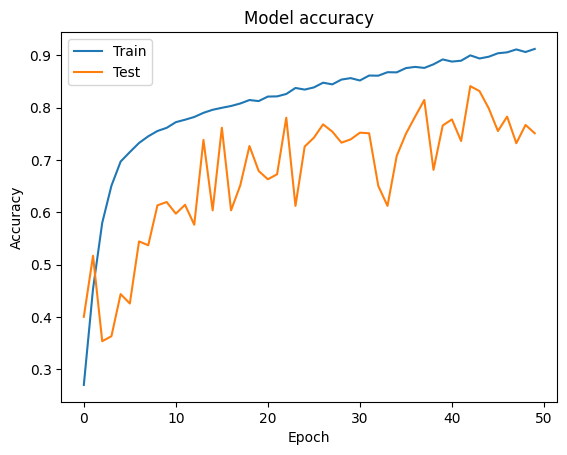

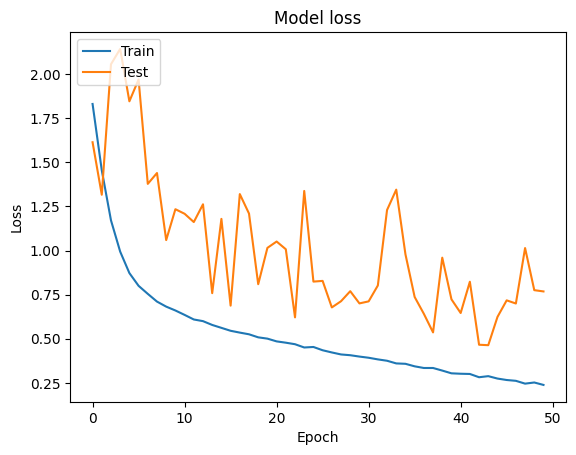

In [42]:
# Plot training history
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Call the function to plot training history
plot_training_history(history)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)  # Assuming y_test is one-hot encoded

# Accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f'Accuracy: {accuracy:.4f}')

30/30 [==============================] - 2s 61ms/step
Accuracy: 0.7511


In [45]:
# Precision
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
print(f'Precision: {precision:.4f}')

Precision: 0.7901


In [46]:
# Recall
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
print(f'Recall: {recall:.4f}')

Recall: 0.7511


In [47]:
# F1 Score
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.7472


In [48]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[ 93   9   1   8   1   0   9   0]
 [  0  37   0   7   0   0   0   0]
 [  1   4 101  12   4   0  10   9]
 [  0  11   0 113   2   2   2   0]
 [  0   0   5   2  86   0  19   3]
 [  0   3  38  27   9  58   2   4]
 [  0   1   0   9   1   0  99   0]
 [  0   0   9   1   0   2   8 122]]


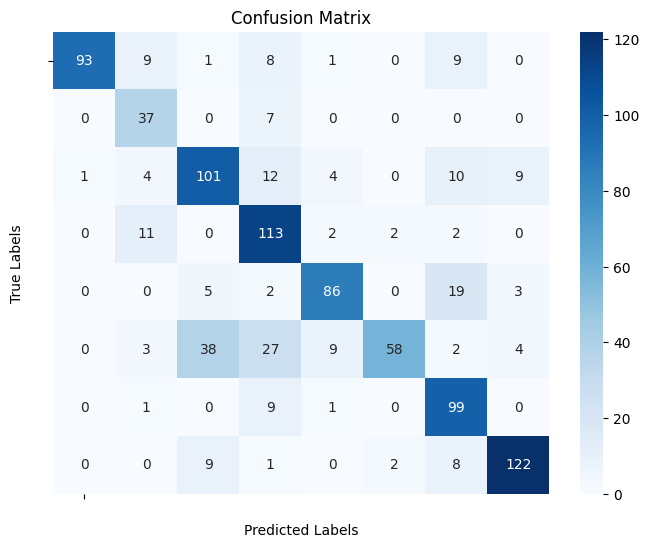

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=" ", yticklabels=" ")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()